In [1]:
import os,sys,glob,numpy as np,pandas as pd
import nibabel as nib

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm

import seaborn as sns

from nilearn.plotting import plot_surf_stat_map,view_surf

In [2]:
#I will push this file to the repo as soon as I get the chance
f2 = '/home/gabi/Documents/kimel/brainhack_2019/BHTO19_GradientsVariability/data/MSC/cifti/sub-MSC01_ses-func01_task-rest_bold_32k_fsLRCIFTI2.dtseries.nii'
img = nib.load(f2)
dat = img.get_data()


## John's Code for Reading In Atlases (annotated by gabi)

In [111]:
"""
dts_file = '../data/rfMRI_REST1_LR_Atlas_hp2000_clean.dtseries.nii' #this is the cifti participant file
dts_img = nib.load(dts_file)
dts_dat = dts_img.get_data()

lab_file =  '/external/rprshnas01/netdata_kcni/jglab/Data/Balsa/null_WG33/Gordon333_FreesurferSubcortical.32k_fs_LR.dlabel.nii'
lab_img = nib.load(lab_file)
lab_dat = np.squeeze(lab_img.get_data())

f = '/external/rprshnas01/netdata_kcni/jglab/Data/Balsa/null_WG33/S900.sulc_MSMAll.32k_fs_LR.dscalar.nii'
sulc_img = nib.load(f)
sulc_ax1 = sulc_img.header.get_axis(1)
sulc_dat = np.squeeze(sulc_img.get_data())

f = '/external/rprshnas01/netdata_kcni/jglab/Data/Balsa/null_WG33/S900.L.inflated_MSMAll.32k_fs_LR.surf.gii'
lhi_img = nib.load(f)
lhi_vtx = lhi_img.darrays[0].data
lhi_tri = lhi_img.darrays[1].data

f = '/external/rprshnas01/netdata_kcni/jglab/Data/Balsa/null_WG33/S900.R.inflated_MSMAll.32k_fs_LR.surf.gii'
rhi_img = nib.load(f)
rhi_vtx = rhi_img.darrays[0].data
rhi_tri = rhi_img.darrays[1].data
""";

## Gabi's Attempt to Replicate What John is Doing

In [112]:
dts_file = '/home/gabi/Documents/kimel/brainhack_2019/BHTO19_GradientsVariability/data/MSC/cifti/sub-MSC01_ses-func01_task-rest_bold_32k_fsLRCIFTI2.dtseries.nii'
dts_img = nib.load(dts_file)
dts_dat = dts_img.get_data()

#Schaeffer atlas, gfrom https://github.com/ThomasYeoLab/CBIG/blob/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/HCP/fslr32k/cifti/Schaefer2018_400Parcels_17Networks_order.dscalar.nii
lab_file = '/home/gabi/Documents/kimel/brainhack_2019/BHTO19_GradientsVariability/data/schaefer/Schaefer2018_400Parcels_17Networks_order.dlabel.nii'
lab_img = nib.load(lab_file)
lab_dat = np.squeeze(lab_img.get_data())

#these are from ciftify
f = '/home/gabi/Documents/kimel/brainhack_2019/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.sulc_MSMAll.32k_fs_LR.dscalar.nii'
sulc_dat = np.squeeze(sulc_img.get_data())

f = '/home/gabi/Documents/kimel/brainhack_2019/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii'
lhi_img = nib.load(f)
lhi_vtx = lhi_img.darrays[0].data
lhi_tri = lhi_img.darrays[1].data

f = '/home/gabi/Documents/kimel/brainhack_2019/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii'
rhi_img = nib.load(f)
rhi_vtx = rhi_img.darrays[0].data
rhi_tri = rhi_img.darrays[1].data

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [137]:
lab_ax1 = lab_img.header.get_axis(1)
lab_dat = np.squeeze(lab_img.get_data())


In [138]:
lh_idxs,rh_idxs = [],[]
for a_it in range(0,lab_ax1.size):
    el = lab_ax1.get_element(a_it)
    if el[2] == 'CIFTI_STRUCTURE_CORTEX_LEFT':
        lh_idxs.append([a_it,el[1]])
    elif el[2] == 'CIFTI_STRUCTURE_CORTEX_RIGHT':        
        rh_idxs.append([a_it,el[1]])
lh_idxs = np.array(lh_idxs)
rh_idxs = np.array(rh_idxs)

In [115]:
#lh_idxs,rh_idxs = [],[]
#for a_it in range(0,sulc_ax1.size):
#    el = sulc_ax1.get_element(a_it)
#    if el[2] == 'CIFTI_STRUCTURE_CORTEX_LEFT':
#       lh_idxs.append([a_it,el[1]])
#    elif el[2] == 'CIFTI_STRUCTURE_CORTEX_RIGHT':        
#        rh_idxs.append([a_it,el[1]])
#lh_idxs = np.array(lh_idxs)
#rh_idxs = np.array(rh_idxs)

In [139]:
dts_dat.shape

(818, 65890)

In [140]:
lh_idxs

array([[    0,     0],
       [    1,     1],
       [    2,     2],
       ...,
       [32489, 32489],
       [32490, 32490],
       [32491, 32491]])

In [119]:
lab_dat.shape

(64984,)

In [121]:
lhi_vtx.shape

(32492, 3)

In [123]:
lab_dat.shape

(64984,)

In [124]:
lh_idxs.max()

32491

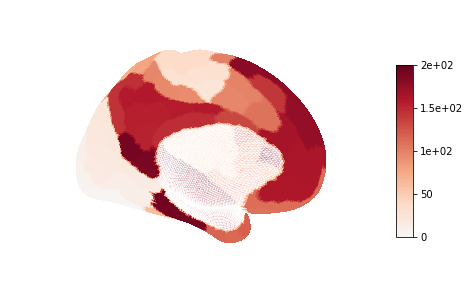

In [143]:
#this works
lh_dat = np.zeros_like(lhi_vtx[:,0])
lh_dat[lh_idxs[:,1]] = lab_dat[lh_idxs[:,0]]
                               
disp = plot_surf_stat_map([lhi_vtx,lhi_tri],lh_dat,cmap='RdBu_r',hemi='right', view='lateral');


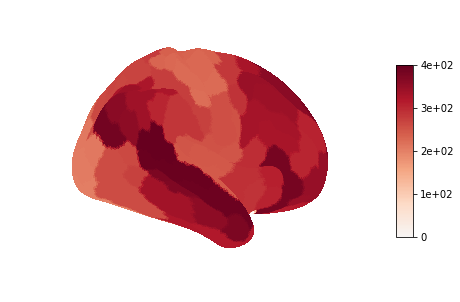

In [142]:
T#this works
rh_dat = np.zeros_like(rhi_vtx[:,0])
rh_dat[rh_idxs[:,1]] = lab_dat[rh_idxs[:,0]]
                               
disp = plot_surf_stat_map([rhi_vtx,rhi_tri],rh_dat,cmap='RdBu_r',hemi='right', view='lateral');


In [128]:
lab_dat.shape

(64984,)

In [127]:
dts_dat.shape

(818, 65890)

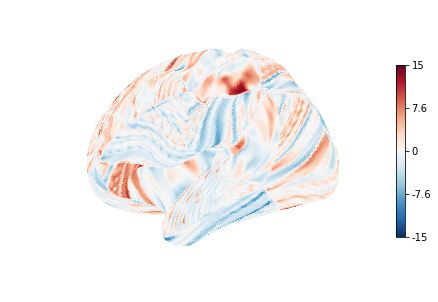

In [130]:
#This doesn't work, not sure why
n = 50

lh_dat = np.zeros_like(lhi_vtx[:,0])
lh_dat[lh_idxs[:,1]] = dts_dat.T[lh_idxs[:,0],n]

rh_dat = np.zeros_like(rhi_vtx[:,0])
rh_dat[rh_idxs[:,1]] = dts_dat.T[rh_idxs[:,0],n]

#disp = plot_surf_stat_map([lhi_vtx,lhi_tri],lh_dat,cmap='RdBu_r',hemi='left', view='lateral');
#disp = plot_surf_stat_map([lhi_vtx,lhi_tri],lh_dat,cmap='RdBu_r',hemi='left', view='medial');


disp = plot_surf_stat_map([lhi_vtx,lhi_tri],lh_dat,cmap='RdBu_r',hemi='left', view='lateral');
#disp = plot_surf_stat_map([rhi_vtx,rhi_tri],rh_dat,cmap='RdBu_r',hemi='right', view='medial');

In [99]:
dts_dat.shape

(818, 65890)

In [45]:
lab_dat.shape

(64984,)

In [46]:
lab_un

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [47]:
dts_dat.shape

(818, 65890)

In [61]:
lab_dat.shape

(64984,)

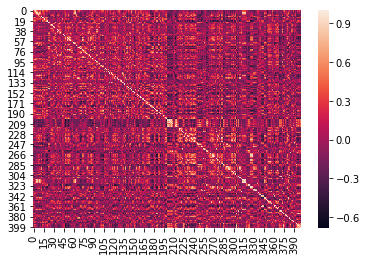

In [40]:
#also doesn't work, unsure why.
lab_un = np.unique(lab_dat)

pts_dat = np.zeros([dts_dat.shape[0],lab_un.shape[0]])
for l_it,l in enumerate(lab_un):
    idxs = np.nonzero(lab_dat == l)[0]
    pts_dat[:,l_it] = np.mean(dts_dat[:,idxs],axis=1)
pts_corr = np.corrcoef(pts_dat.T)

sns.heatmap(pts_corr)

In [52]:
pts_dat0 = pts_dat[0,:]
pts_dat0_onsurf = pts_dat0

In [59]:
lh_idxs.max()

32491

In [58]:
pts_dat0.

(401,)

In [60]:
pts_dat0[lh_idxs[:,1]]

IndexError: index 445 is out of bounds for axis 0 with size 401

In [10]:
pts_dat.T

array([[ 0.63767093,  0.87266231,  0.71637177, ...,  0.33732998,
        -0.03411244, -0.40926477],
       [ 0.42911077,  0.36275768, -0.09620596, ...,  0.51222563,
         0.15100713,  0.06616963],
       [-0.69536591, -0.19226506,  0.77918583, ..., -0.34812477,
        -0.63674778, -0.74745959],
       ...,
       [ 0.30879033,  0.9219138 ,  0.75276953, ..., -0.25103989,
        -0.33534771, -0.6201942 ],
       [ 0.87487113,  0.67109394, -0.71785152, ..., -0.08089699,
        -0.38760433, -0.35500702],
       [-0.85278738, -0.21953109,  0.40064234, ...,  0.05825109,
        -0.28357124, -0.34356371]])

In [136]:
pts_dat.shape

(818, 401)

In [135]:
evecs.shape

(401, 401)

In [132]:
evals,evecs = np.linalg.eig(pts_corr)

n_evecs = 10
evecs_onsurf = np.zeros([lab_dat.shape[0],n_evecs])    
for l_it,l in enumerate(lab_un):
    for e_it in range(n_evecs):
        idxs = np.nonzero(lab_dat == l)[0]
        evecs_onsurf[idxs,e_it] = evecs[l_it,e_it]

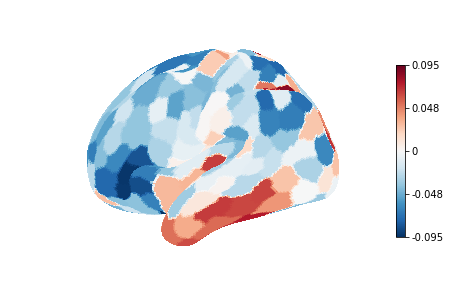

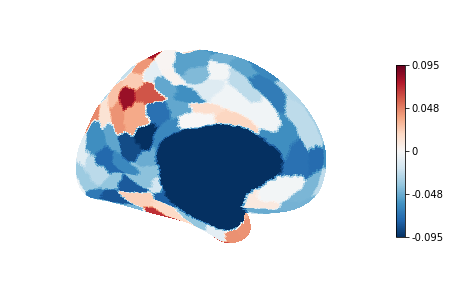

In [134]:
#works
n = 1
lh_dat = np.zeros_like(lhi_vtx[:,0])
lh_dat[lh_idxs[:,1]] = evecs_onsurf[lh_idxs[:,0],n]

rh_dat = np.zeros_like(rhi_vtx[:,0])
rh_dat[rh_idxs[:,1]] = evecs_onsurf[rh_idxs[:,0],n]

disp = plot_surf_stat_map([lhi_vtx,lhi_tri],lh_dat*-1,cmap='RdBu_r',hemi='left', view='lateral'); #downsample surface
disp = plot_surf_stat_map([lhi_vtx,lhi_tri],lh_dat*-1,cmap='RdBu_r',hemi='left', view='medial');


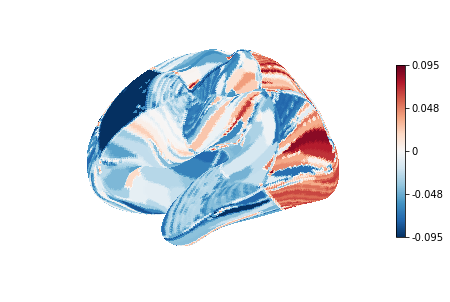

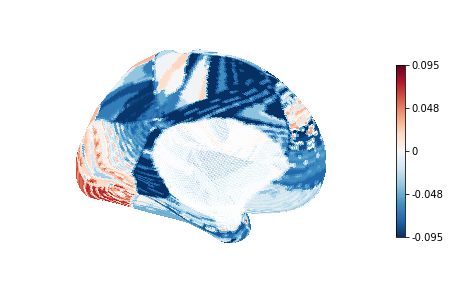

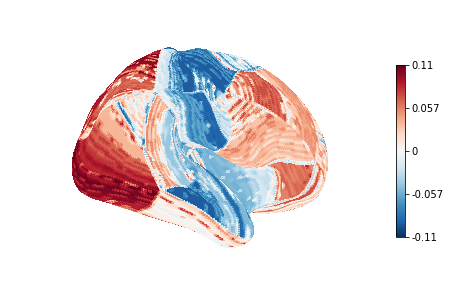

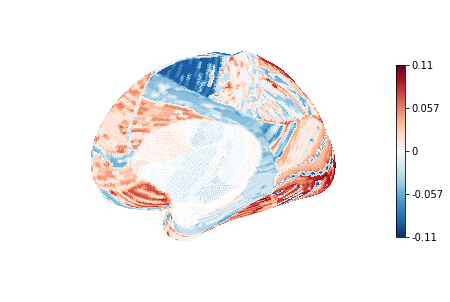

In [43]:
#doesn't work, unsure why
n = 1

lh_dat = np.zeros_like(lhi_vtx[:,0])
lh_dat[lh_idxs[:,1]] = evecs_onsurf[lh_idxs[:,0],n]

rh_dat = np.zeros_like(rhi_vtx[:,0])
rh_dat[rh_idxs[:,1]] = evecs_onsurf[rh_idxs[:,0],n]

disp = plot_surf_stat_map([lhi_vtx,lhi_tri],lh_dat*-1,cmap='RdBu_r',hemi='left', view='lateral'); #downsample surface
disp = plot_surf_stat_map([lhi_vtx,lhi_tri],lh_dat*-1,cmap='RdBu_r',hemi='left', view='medial');


disp = plot_surf_stat_map([rhi_vtx,rhi_tri],rh_dat*-1,cmap='RdBu_r',hemi='right', view='lateral');
disp = plot_surf_stat_map([rhi_vtx,rhi_tri],rh_dat*-1,cmap='RdBu_r',hemi='right', view='medial');

In [13]:
pts_dat.shape
pts_dat

array([[ 0.63767093,  0.42911077, -0.69536591, ...,  0.30879033,
         0.87487113, -0.85278738],
       [ 0.87266231,  0.36275768, -0.19226506, ...,  0.9219138 ,
         0.67109394, -0.21953109],
       [ 0.71637177, -0.09620596,  0.77918583, ...,  0.75276953,
        -0.71785152,  0.40064234],
       ...,
       [ 0.33732998,  0.51222563, -0.34812477, ..., -0.25103989,
        -0.08089699,  0.05825109],
       [-0.03411244,  0.15100713, -0.63674778, ..., -0.33534771,
        -0.38760433, -0.28357124],
       [-0.40926477,  0.06616963, -0.74745959, ..., -0.6201942 ,
        -0.35500702, -0.34356371]])

In [29]:
import brainspace
from brainspace.gradient import GradientMaps

#This is where I started combining two things w/o thinking hard

sch400_hcpfc_gm_pca = GradientMaps(n_components=2, approach='pca', kernel=None)
sch400_hcpfc_gm_pca.fit(pts_corr)

GradientMaps(alignment=None, approach='pca', kernel=None, n_components=2,
       random_state=None)

In [34]:
#This stuff worked before kind of except it was using the glaser connectivity w a schaefer parcelation, so had to change to schaefer connectivity. Everything broke after schaefer switch

import brainspace
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres,plot_surf
from brainspace.datasets import load_group_fc, load_parcellation
from brainspace.gradient import GradientMaps

from brainspace.utils.parcellation import map_to_labels

sch400_parc = load_parcellation('schaefer', scale=400, join=True)

sch400_parc_2 = load_parcellation('schaefer', scale=400, join=True)

sch400_hcpfc_gm_pca_surf_pc1 = map_to_labels(sch400_hcpfc_gm_pca.gradients_[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan)

sch400_hcpfc_gm_pca_surf_pc2 = map_to_labels(sch400_hcpfc_gm_pca.gradients_[:, 1], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan)



IndexError: index 394 is out of bounds for axis 0 with size 360

/home/gabi/anaconda3/envs/neuroimaging-analysis/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


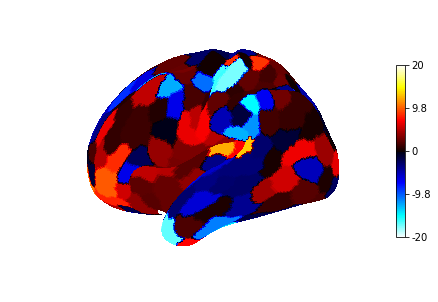

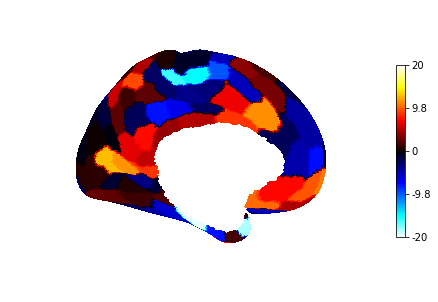

In [22]:
disp = plot_surf_stat_map([lhi_vtx,lhi_tri],
                          sch400_hcpfc_gm_pca_surf_pc1[:32492]*-1,view='lateral',hemi='left');

disp = plot_surf_stat_map([lhi_vtx,lhi_tri],
                          sch400_hcpfc_gm_pca_surf_pc1[:32492]*-1,view='medial',hemi='left');

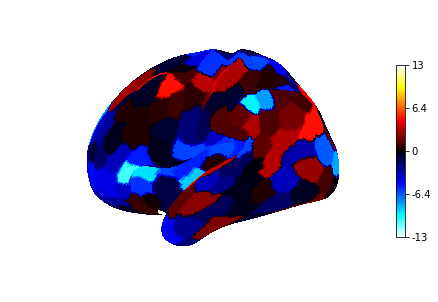

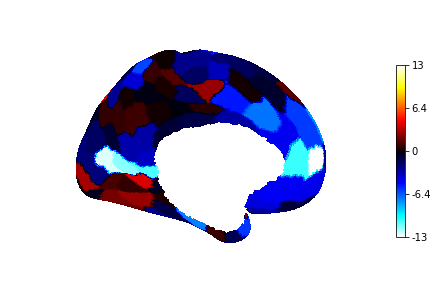

In [23]:
disp = plot_surf_stat_map([lhi_vtx,lhi_tri],
                          sch400_hcpfc_gm_pca_surf_pc2[:32492]*-1,view='lateral',hemi='left');

disp = plot_surf_stat_map([lhi_vtx,lhi_tri],
                          sch400_hcpfc_gm_pca_surf_pc2[:32492]*-1,view='medial',hemi='left');

In [25]:
pts_corr.shape

(360, 360)